# Ejercicio 2 - Opciones fuera de panel - Volatilidad Implicita - Superficie de Volatilidad

### PROBLEMA: Se necesita ponerle precio a un contrato que NO esta en el mercado es decir, un par (strike, expiracion) que NO este en el mercado para un contrato OTC. 

La idea de este ejercicio es tomar un ticker en el mercado (ARG o US), obtener el panel de opciones, obtener las volatilidades implicitas calibrando con precios de mercado.

Luego generaremos una superficie de volatilidad homogenea (strikes y maturities)

Por ultimo generaremos un panel de opciones alternativo mas granular que el original usando los modelos.

Ahora podriamos obtener el precio de la opcion del contrato OTC


## 1) Repetir 1, 2 y 3 del ejercicio de Put Call Parity [Dificultad 2]


### Obtencion del panel de opciones de un ticker del mercado

Para este paso pueden usar los modulos data_nyse o data_byma vistos en clase. Pueden usar la version clean del metodo o pueden generarse el panel como les guste, agregando columnas de mercado o generadas por ustedes.

Ejemplos 

Tickers
ARG: 'GGAL'
USA: 'AAPL'


### Obtencion de curva de tasa para cada maturity o TTM o expiracion

En clase hay un ejemplo de generacion de curva 'risk free' usando las tasas Libor e interpolandolas. Pueden usar otras curvas de descuento. En el caso Argentina pueden usar curva de caucion, curva Badlar, investigar el tema.Siguiendo con el dataframe del panel, se generaria una columna nueva con la tasa a usar para ese TTM/madurez. 

Ejemplos (guia, se pueden proponer otros)

USA:https://www.global-rates.com/interest-rates/libor/libor.aspx


ARG: 

BADLAR: https://www.bcra.gob.ar/PublicacionesEstadisticas/Principales_variables_datos.asp?serie=1222&detalle=BADLAR%20en%20pesos%20de%20bancos%20privados%20(en%20%%20n.a.)

CAUCIONES: https://www.invertironline.com/mercado/cotizaciones/argentina/cauciones

### Obtencion de dividendo / curva de dividendos para cada maturity o TTM o expiracion

En clase hay un ejemplo de obtencion del dividend yield usando yfinance. Pueden usar otros modelos que usen las fechas de los posibles pagos de dividendos y la estimacion u otras fuentes de datos para el caso Argentino. Siguiendo con el dataframe del panel, se generaria una columna nueva con el dividend yield a usar para ese TTM/madurez.

ARG: 
https://es.investing.com/equities/grupo-financiero-galicia-sa-adr-dividends

US (modulo yfinance): 
ticker = 'AAPL'
data = yf.Ticker(ticker)
div = float(data.info['dividendYield'])


In [1]:
#AQUI CODIGO
### Mismo codigo que Ej1!

import sys
sys.path.append('..')

from Codigo.data_nyse import *
from Codigo.data_byma import *

from Codigo.opcion_americana_bin import opcion_americana_bin
from Codigo.opcion_europea_bs import opcion_europea_bs

import yfinance as yf
import datetime

In [2]:
# paneles NYSE

ticker_nyse = 'AAPL' 
panel_opciones_nyse = obtener_panel_opciones_nyse(ticker = ticker_nyse, clean_flag = True)

In [3]:
#AQUI CODIGO


#Libor
#https://es.global-rates.com/tipos-de-interes/libor/dolar-usa/dolar-usa.aspx
#Ad hoc curve de tasas:

import numpy as np

Dias = np.array([1, 7, 30, 60, 91, 182, 365])

Tasas = np.array([0.0008125,
                 0.0009275,
                 0.0014,
                 0.0018038,
                 0.002335,
                 0.0024475,
                 0.003575])

curva = np.vstack((Dias, Tasas)).T

from scipy import interpolate
curva_interp = interpolate.interp1d(Dias, Tasas, fill_value='extrapolate')


#Cargo la tasa en una columna
panel_opciones_nyse['Tasa'] = curva_interp(panel_opciones_nyse['TTM'])

In [4]:
#AQUI CODIGO


data = yf.Ticker(ticker_nyse) 
try:
    div = float(data.info['dividendYield'])
except:
    div = 0.0


#Cargo el dividendo en una columna
panel_opciones_nyse['Div'] = div

In [5]:
#AQUI CODIGO

import math
panel_opciones_nyse['Precio_Avg'] = (panel_opciones_nyse.Bid+panel_opciones_nyse.Ask)/2
panel_opciones_nyse = panel_opciones_nyse.sort_values(by=['TTM','Strike'], inplace=False )

#panel_opciones_nyse.drop(['index'],axis=1, inplace=True)

In [6]:
#Muestro panel

panel_opciones_nyse.head(10)

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,impliedVolatility,Ask,Bid,Tasa,Div,Precio_Avg
0,AAPL201009C00060000,AAPL,113.88,C,60.0,3,53.75,1.898000,3.931641,54.00,53.90,0.000851,0.007,53.950
1966,AAPL201009P00060000,AAPL,113.88,P,60.0,3,0.01,1.898000,1.937500,0.01,0.00,0.000851,0.007,0.005
1,AAPL201009C00065000,AAPL,113.88,C,65.0,3,49.85,1.752000,3.550782,49.05,48.95,0.000851,0.007,49.000
1967,AAPL201009P00065000,AAPL,113.88,P,65.0,3,0.01,1.752000,1.750001,0.01,0.00,0.000851,0.007,0.005
2,AAPL201009C00070000,AAPL,113.88,C,70.0,3,43.55,1.626857,3.109377,44.00,43.90,0.000851,0.007,43.950
1968,AAPL201009P00070000,AAPL,113.88,P,70.0,3,0.01,1.626857,1.500002,0.01,0.00,0.000851,0.007,0.005
3,AAPL201009C00075000,AAPL,113.88,C,75.0,3,38.87,1.518400,2.755862,39.05,38.90,0.000851,0.007,38.975
1969,AAPL201009P00075000,AAPL,113.88,P,75.0,3,0.01,1.518400,1.312503,0.01,0.00,0.000851,0.007,0.005
4,AAPL201009C00080000,AAPL,113.88,C,80.0,3,33.47,1.423500,2.333989,33.95,33.80,0.000851,0.007,33.875
1970,AAPL201009P00080000,AAPL,113.88,P,80.0,3,0.01,1.423500,1.125004,0.01,0.00,0.000851,0.007,0.005


## 2) Con la ayuda de un modelo de pricing de la libreria generar para cada una de las opciones las volatilidades implicitas  [Dificultad 3]

Aqui pueden elegir el modelo a usar. Una recomendacion seria usar el Binomial asi se puede captar la condicion ejercicio temprano de las opcioens (Americanas).
Tambine pueden elegir el metodo numerico para buscar la optimizacion. Newton fue visto en clase, pero aun mas sencillo seria usar Biseccion (ver abajo)

No es trivial par anada ver al metodo de pricing con todos sus parametros como otra funcion con solo la volatilidad (sigma) como variable y los demas parametros fijos para hallar el optimo.

In [7]:
#Ejemplo de algoritmo de biseccion

#Uso este algoritmo de biseccion en el codigo futuro

def samesign(a, b):
    return a * b > 0

def bisect(func, low, high, iters=100):
    'Find root of continuous function where f(low) and f(high) have opposite signs'

    assert not samesign(func(low), func(high))

    for i in range(iters):
        midpoint = (low + high) / 2.0
        if samesign(func(low), func(midpoint)):
            low = midpoint
        else:
            high = midpoint

    return midpoint

def f(x):
    return -26 + 85*x - 91*x**2 +44*x**3 -8*x**4 + x**5

x = bisect(f, 0, 1)
print (x, f(x))

0.5570255162865259 3.7470027081099033e-16


### Genero la funcion que voy a usar para buscarle el cero.
### Fijando todos los parametros
### i.e.F(sigma) =  Precio de Mercado - Precio Teorico(sigma)

In [8]:
# Defino la funcion de volatilidad implicita. Busco el cero de la funcion O_T-O_M (opcion teorica menos opcion mercado)
def impvolfunc_bs(tipo, S, K, T, r, precio_mercado, div):
    
    
    func = lambda sigma: (opcion_europea_bs(tipo, S, K, T, r, sigma, div) - precio_mercado)

    impvol = bisect(func,0.0001, 6, 100)
    return impvol


def impvolfunc_bin(tipo, S, K, T, r, precio_mercado, div, pasos = 1000):
    func = lambda sigma: (opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos) - precio_mercado)
    
    impvol = bisect(func,0.0001, 6, 100)
    return impvol


### Recorro el dataframe y calculo volatilidad implicita, si el algoritmo no converge o falla pongo volatilidad 0.0

In [9]:

panel_opciones_nyse['volatilidad_implicita_bs'] = 0.0
panel_opciones_nyse['volatilidad_implicita_bin'] = 0.0
#AQUI CODIGO

for idx in list(panel_opciones_nyse.index):
    
    #Definimos los inputs
    S = panel_opciones_nyse['Spot'].values[idx] #Strike (K)
    K = panel_opciones_nyse['Strike'].values[idx] #Strike (K)
    T = panel_opciones_nyse['TTM'].values[idx]/365
    r = panel_opciones_nyse['Tasa'].values[idx]
    div = panel_opciones_nyse['Div'].values[idx]
    CP = panel_opciones_nyse['CallPut'].values[idx]
    pasos = 10
    if CP == 'C':
        tipo = 'CALL'
    else:
        tipo = 'PUT'
    
    
    precio_mercado = panel_opciones_nyse['Precio_Avg'].values[idx]
    
    try:
        volatilidad_implicita_bs = impvolfunc_bs(tipo, S, K, T, r, precio_mercado, div)
        volatilidad_implicita_bin = impvolfunc_bin(tipo, S, K, T, r, precio_mercado, div, pasos)
        
    except:
        volatilidad_implicita_bs = 0.0
        volatilidad_implicita_bin = 0.0

        
    panel_opciones_nyse['volatilidad_implicita_bs'].values[idx] = volatilidad_implicita_bs  
    panel_opciones_nyse['volatilidad_implicita_bin'].values[idx] = volatilidad_implicita_bin





In [10]:
panel_opciones_nyse

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,impliedVolatility,Ask,Bid,Tasa,Div,Precio_Avg,volatilidad_implicita_bs,volatilidad_implicita_bin
0,AAPL201009C00060000,AAPL,113.88,C,60.0,3,53.75,1.898000,3.931641,54.00,53.90,0.000851,0.007,53.950,3.035955,3.082259
1966,AAPL201009P00060000,AAPL,113.88,P,60.0,3,0.01,1.898000,1.937500,0.01,0.00,0.000851,0.007,0.005,2.297887,2.452366
1,AAPL201009C00065000,AAPL,113.88,C,65.0,3,49.85,1.752000,3.550782,49.05,48.95,0.000851,0.007,49.000,2.878832,2.959182
1967,AAPL201009P00065000,AAPL,113.88,P,65.0,3,0.01,1.752000,1.750001,0.01,0.00,0.000851,0.007,0.005,2.026377,2.164348
2,AAPL201009C00070000,AAPL,113.88,C,70.0,3,43.55,1.626857,3.109377,44.00,43.90,0.000851,0.007,43.950,2.364191,2.397835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,AAPL230120C00200000,AAPL,113.88,C,200.0,836,8.80,0.569400,0.412665,9.00,8.30,0.006477,0.007,8.650,0.406720,0.399893
3813,AAPL230120P00200000,AAPL,113.88,P,200.0,836,100.00,0.569400,0.394629,94.70,91.80,0.006477,0.007,93.250,0.399804,0.386078
1964,AAPL230120C00210000,AAPL,113.88,C,210.0,836,8.17,0.542286,0.416052,8.15,7.35,0.006477,0.007,7.750,0.408878,0.402151
1965,AAPL230120C00220000,AAPL,113.88,C,220.0,836,6.90,0.517636,0.417303,7.30,6.60,0.006477,0.007,6.950,0.410673,0.406027


### Veo el panel y comparo con lo que trae Yahoo (me quedo con aquellas que la volatilidad no dio 0.0!)

In [11]:

panel_opciones_nyse = panel_opciones_nyse[panel_opciones_nyse.volatilidad_implicita_bs>0.0]
panel_opciones_nyse[['Strike','TTM','CallPut','impliedVolatility','volatilidad_implicita_bs','volatilidad_implicita_bin']].head(10)

,Strike,TTM,CallPut,impliedVolatility,volatilidad_implicita_bs,volatilidad_implicita_bin
0,60.0,3,C,3.931641,3.035955,3.082259
1966,60.0,3,P,1.937500,2.297887,2.452366
1,65.0,3,C,3.550782,2.878832,2.959182
1967,65.0,3,P,1.750001,2.026377,2.164348
2,70.0,3,C,3.109377,2.364191,2.397835
1968,70.0,3,P,1.500002,1.774048,1.898030
3,75.0,3,C,2.755862,2.143625,2.200120
1969,75.0,3,P,1.312503,1.537960,1.650377
1970,80.0,3,P,1.125004,1.315692,1.418948
5,85.0,3,C,2.034185,1.422468,1.438075


In [12]:
# Regresion descriptiva contra yahoo
import statsmodels.api as sm
Y = panel_opciones_nyse['impliedVolatility']
X = panel_opciones_nyse['volatilidad_implicita_bs']

model = sm.OLS(Y,X)
results = model.fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      impliedVolatility   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          1.656e+05
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                        0.00
Time:                        16:55:10   Log-Likelihood:                          1289.9
No. Observations:                2576   AIC:                                     -2578.
Df Residuals:                    2575   BIC:                                     -2572.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
volatilidad_implicita_bs     1.0014      0.002    406.903      0.000       0.997       1.006
==============================================================================
Omnibus:                      798.321   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20544.857
Skew:                          -0.887   Prob(JB):                         0.00
Kurtosis:                      16.721   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3) Generar una grilla uniforme (de strikes y expiries) de volatilidades implicitas (superficie de volatilidad) [Dificultad 5]

Aqui la idea es usando las volatilidades implicitas provenientes del mercado, "rellenar" una grilla uniforme con volatilidades.

Se puede pasar directo a 4


Este es un ejercicio D I F I C I L - el solo hecho de investigar el tema y llegar a alguna solucion parcial, al nivel de este curso seria suficiente


Bibliografia

De menor a mayor

1) Esos videos ayudan a enteder el problema:
https://www.youtube.com/watch?v=iZR4j3K6Ayw 

2) Un extracto de un libro de Gatheral con el contexto:
http://faculty.baruch.cuny.edu/jgatheral/ImpliedVolatilitySurface.pdf 

3) Este trabajo de Cris Homescu (comparti unos años de trabajo con el) es un compendio bastante extenso de metodologias
https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1882567 

4) Aqui hay una tesis muy completa comparando diferentes metodos
https://www.diva-portal.org/smash/get/diva2:1191887/FULLTEXT01.pdf  

Voy a ver si consigo escribir 2/3 slides sobre un método en particular que yo use en el pasado. 
 



### Tomo los TTMs y los strikes

In [13]:
#AQUI CODIGO

#Selecciono los TTMs y strikes disponibles

TTMs = list(set(panel_opciones_nyse.TTM.values))
TTMs.sort()

print(TTMs)

strikes = list(set(panel_opciones_nyse['Strike'].values))
strikes.sort()
print(strikes)

[3, 10, 17, 24, 31, 38, 45, 73, 101, 164, 192, 255, 346, 472, 619, 710, 836]
[18.75, 20.0, 21.25, 22.5, 23.75, 25.0, 26.25, 27.5, 28.75, 30.0, 31.25, 32.5, 33.75, 35.0, 36.25, 37.5, 38.75, 40.0, 41.25, 42.5, 43.75, 45.0, 46.25, 47.5, 48.75, 50.0, 51.25, 52.5, 53.75, 55.0, 56.25, 57.5, 58.75, 60.0, 61.25, 62.5, 63.75, 65.0, 66.25, 67.5, 68.75, 70.0, 71.25, 72.5, 73.75, 75.0, 76.25, 77.5, 78.75, 80.0, 81.25, 82.5, 83.75, 85.0, 86.25, 87.5, 88.75, 90.0, 91.25, 92.5, 93.0, 93.75, 94.0, 95.0, 96.0, 96.25, 97.0, 97.5, 98.0, 98.5, 98.75, 99.0, 99.5, 100.0, 101.0, 101.25, 102.0, 102.5, 103.0, 103.75, 104.0, 105.0, 106.0, 106.25, 107.0, 107.5, 108.0, 108.75, 109.0, 110.0, 111.0, 111.25, 112.0, 112.5, 113.0, 113.75, 114.0, 115.0, 116.0, 116.25, 117.0, 117.5, 118.0, 118.75, 119.0, 120.0, 121.0, 121.25, 122.0, 122.5, 123.0, 123.75, 124.0, 125.0, 126.0, 126.25, 127.0, 127.5, 128.0, 128.75, 129.0, 130.0, 131.0, 131.25, 132.0, 132.5, 133.0, 133.75, 134.0, 135.0, 136.0, 136.25, 137.0, 137.5, 138.0, 13

### Gnero una matriz de impvols

In [14]:
#Trabajo con las calls

CP = 'C'

implied_vols = np.zeros(shape = (len(strikes), len(TTMs)))

for i in range(len(strikes)):
    for j in range(1,len(TTMs)):
        try:
            implied_vols[i][j] = panel_opciones_nyse[(panel_opciones_nyse.CallPut== 'C') & (panel_opciones_nyse.Strike==strikes[i]) & (panel_opciones_nyse.TTM==TTMs[j])].volatilidad_implicita_bs.values[0]
            #implied_vols[i][j] = panel_opciones_nyse[(panel_opciones_nyse.CallPut== CP) & (panel_opciones_nyse.Strike==strikes[i]) & (panel_opciones_nyse.TTM==TTMs[j])].impliedVolatility.values[0]
            
        except:
            implied_vols[i][j] = 'Nan'
           
print(implied_vols)

[[0.                nan        nan ...        nan        nan        nan]
 [0.                nan        nan ...        nan        nan        nan]
 [0.                nan        nan ...        nan        nan        nan]
 ...
 [0.                nan        nan ...        nan        nan        nan]
 [0.         5.72688011        nan ...        nan 1.35884314        nan]
 [0.         5.63747796        nan ... 1.27506888 1.27992647        nan]]


### Me quedo con volatilidades mayores a cero y busco un bloque denso de puntos. Lo escribo como dataframe

In [15]:
import pandas as pd
df = pd.DataFrame(implied_vols, 
                  index = strikes, 
                  columns = TTMs)
df = df[df>0.00010]

#INTERPOLATE!
#df = df.interpolate(method='linear', axis=1)
#df = df.interpolate(method='linear', axis=0)


df = df.drop([df.columns[0]] ,  axis='columns')
TTMs_2=TTMs[1:]
df = df.dropna()

df

,10,17,24,31,38,45,73,101,164,192,255,346,472,619,710,836
80.0,1.031069,0.777970,0.736452,0.727653,0.668974,0.631715,0.553969,0.528421,0.500658,0.488316,0.473450,0.446735,0.433474,0.421838,0.414702,0.428714
85.0,0.874572,0.780590,0.693113,0.679504,0.610546,0.579263,0.535656,0.513043,0.484513,0.474441,0.458519,0.438263,0.428209,0.417116,0.410589,0.417180
95.0,0.650833,0.525776,0.549544,0.572440,0.534942,0.529960,0.483921,0.481685,0.467293,0.455796,0.441889,0.428520,0.417362,0.409397,0.403810,0.403392
100.0,0.560793,0.490712,0.514947,0.555888,0.508050,0.514462,0.476555,0.471196,0.464314,0.451554,0.440220,0.423334,0.415697,0.405335,0.401579,0.407780
105.0,0.501079,0.472063,0.504496,0.530576,0.510287,0.502501,0.472027,0.467909,0.455229,0.448933,0.436867,0.420852,0.411882,0.403744,0.398654,0.408829
110.0,0.490201,0.463528,0.505296,0.526533,0.508161,0.501726,0.468068,0.459654,0.452907,0.444559,0.433594,0.419043,0.409366,0.402216,0.398602,0.405487
115.0,0.467319,0.459762,0.494856,0.522758,0.506694,0.492649,0.463033,0.456430,0.450012,0.439579,0.431249,0.418047,0.409167,0.400013,0.397602,0.404771
120.0,0.460253,0.450480,0.487024,0.514298,0.496646,0.490544,0.456246,0.450963,0.443692,0.439603,0.429397,0.416369,0.406930,0.399049,0.395052,0.401325
125.0,0.465880,0.449071,0.480490,0.505821,0.492973,0.481550,0.451354,0.445092,0.444369,0.435125,0.427729,0.416015,0.405365,0.397708,0.394354,0.403213
130.0,0.500916,0.461566,0.482851,0.503328,0.487707,0.480834,0.446497,0.442234,0.441121,0.435155,0.425986,0.413290,0.405151,0.397011,0.393190,0.397783


### Vuelvo a Numpy

In [16]:
strikes_new = df.index.values.tolist()
TTMs_new = df.columns.tolist()
df_np = df.to_numpy()

### Invoco matplotlib y el 3d plot

In [17]:
#Seteo de Matplotlib
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
from mpl_toolkits import mplot3d

X, Y = np.meshgrid(TTMs_new,strikes_new)

Z = df_np


print('X', np.shape(X))
print('Y', np.shape(Y))
print('Z', np.shape(Z))

X (15, 16)
Y (15, 16)
Z (15, 16)


In [21]:
Z



array([[1.03106915, 0.77797026, 0.73645218, 0.72765307, 0.66897361,
        0.63171518, 0.55396929, 0.52842059, 0.50065784, 0.48831623,
        0.47345045, 0.44673508, 0.43347449, 0.42183775, 0.41470221,
        0.42871352],
       [0.87457247, 0.78058955, 0.69311304, 0.67950448, 0.61054647,
        0.57926327, 0.53565581, 0.51304341, 0.48451335, 0.47444148,
        0.45851914, 0.43826257, 0.42820895, 0.41711644, 0.41058894,
        0.41717998],
       [0.65083293, 0.52577554, 0.54954448, 0.57244017, 0.53494247,
        0.52995998, 0.48392133, 0.48168482, 0.46729325, 0.45579608,
        0.44188864, 0.42852011, 0.41736204, 0.40939743, 0.4038103 ,
        0.40339239],
       [0.56079339, 0.49071204, 0.51494667, 0.55588838, 0.50805011,
        0.51446171, 0.47655518, 0.47119553, 0.46431397, 0.45155438,
        0.44021959, 0.42333365, 0.4156974 , 0.40533496, 0.40157909,
        0.40777981],
       [0.50107944, 0.4720627 , 0.50449592, 0.5305763 , 0.5102869 ,
        0.50250114, 0.47202653, 

### Grafico la superficie de volatildiad

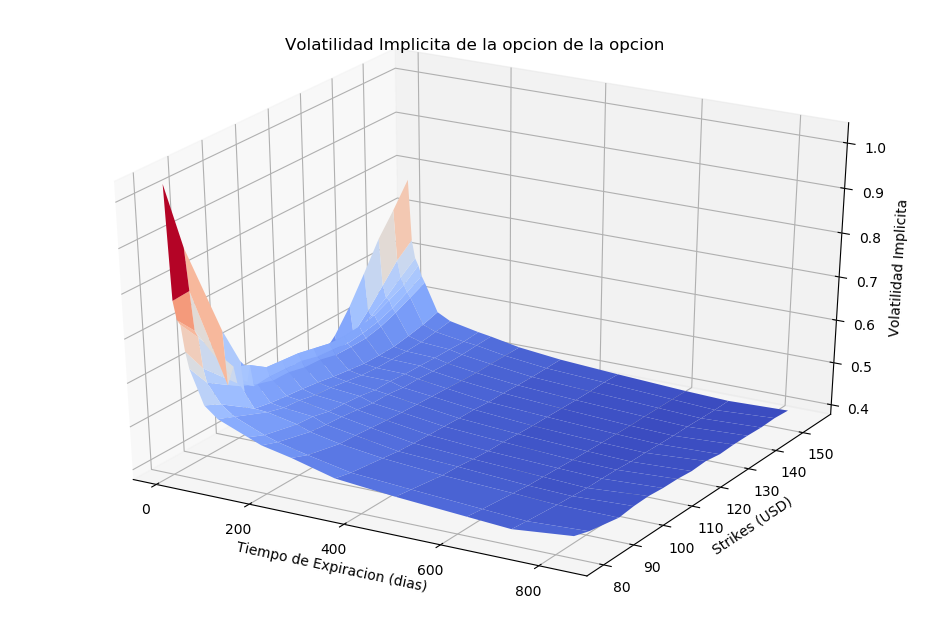

In [18]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')#rstride=1, cstride=1)
                

ax.set_title('Volatilidad Implicita de la opcion de la opcion');
ax.set_xlabel('Tiempo de Expiracion (dias)')
ax.set_ylabel('Strikes (USD)')
ax.set_zlabel('Volatilidad Implicita')

plt.show()

## 4) Generar una grilla uniforme (de strikes y expiries) de precios de opciones [Dificultad 2-3]

Aqui hay dos caminos.

Si se hizo 3) Entonces no es mas que generar precios usando todos los parametros con el modelo de pricing usado para obtener volatilidad implicita. y obtener un nuevo panel con strikes y matirities elegidos por nosotros

Si NO se hizo 3, se puede intentar interpolar los precios de las opciones directamente [NO es 100% correcto, pero ayuda a aprender metodos de interpolacion]

In [ ]:
#AQUI CODIGO






## 5) Obtener el precio de la opcion OTC [Dificultad 2]

Ahora, con todo el panel de precios, obtener interpolando el strike y la madurez buscada.
Si se hizo 3 no es necesario pasar por 4